<a href="https://colab.research.google.com/github/FranciscoAguiar/DataScienceProgramming/blob/master/ProcessingTwitters_UEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
!tar -xvf dados-curso-completo.csv.tar.gz

--2020-10-07 02:47:22--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‚Äòdados-curso-completo.csv.tar.gz.2‚Äô

dados-curso-complet 100%[===================>] 136.70M  51.8MB/s    in 2.6s    

2020-10-07 02:47:25 (51.8 MB/s) - ‚Äòdados-curso-completo.csv.tar.gz.2‚Äô saved [143340808/143340808]

dados-curso-completo.csv


In [25]:
!pip install geopandas

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import nltk
nltk.download('punkt')

from shapely.geometry import Point

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
tweets_df = pd.read_csv('dados-curso-completo.csv')
tweets_df.head()

data              usuario  ... longitude hashtags
0  2020-03-23 18:51:14             Gaboardi  ...       NaN       []
1  2020-03-18 03:18:14   Seu Z√© da Farm√°cia  ...       NaN       []
2  2020-03-29 12:09:27  Mar√≠lia Oliveira üáßüá∑  ...       NaN       []
3  2020-04-01 21:11:07                    üö©  ...       NaN       []
4  2020-03-19 17:49:40       Nova Impress√£o  ... -15.77691       []

[5 rows x 13 columns]

In [28]:
total_records = len(tweets_df.index)
print('Total records:', total_records)

print('Number of records without date:', tweets_df.data.isnull().sum())
print('Number of records without text:', tweets_df.texto.isnull().sum())

no_city_count = tweets_df.lugar.isnull().sum()
no_city_percentage = tweets_df.lugar.isnull().mean() * 100
print('Number of records without city:', no_city_count)
print('Percentage of records without city:', no_city_percentage)

print(tweets_df['pais'].isnull().sum())
print(tweets_df['pais'].isna().sum())
print('lat', tweets_df['latitude'].isna().sum())
print('lat', tweets_df['latitude'].isnull().sum())
print(tweets_df['longitude'].isna().sum())
tweets_df.info()
tweets_df.count()

Total records: 1658825
Number of records without date: 0
Number of records without text: 0
Number of records without city: 1584220
Percentage of records without city: 95.50253944810333
1584225
1584225
lat 1650105
lat 1650105
1650105
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: f

data          1658825
usuario       1658768
apelido       1658825
texto         1658825
retweet       1658825
seguidores    1658825
idioma        1658825
lugar           74605
pais            74600
sigla           74595
latitude         8720
longitude        8720
hashtags      1658825
dtype: int64

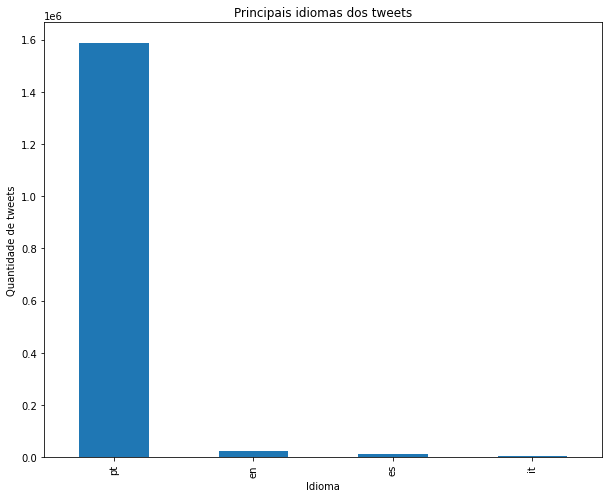

In [29]:
tweets_df.groupby('idioma').idioma.count().sort_values(ascending = False)[:4].plot(kind = 'bar', figsize = (10, 8))
plt.title('Principais idiomas dos tweets')
plt.xlabel('Idioma')
plt.ylabel('Quantidade de tweets')
plt.show()

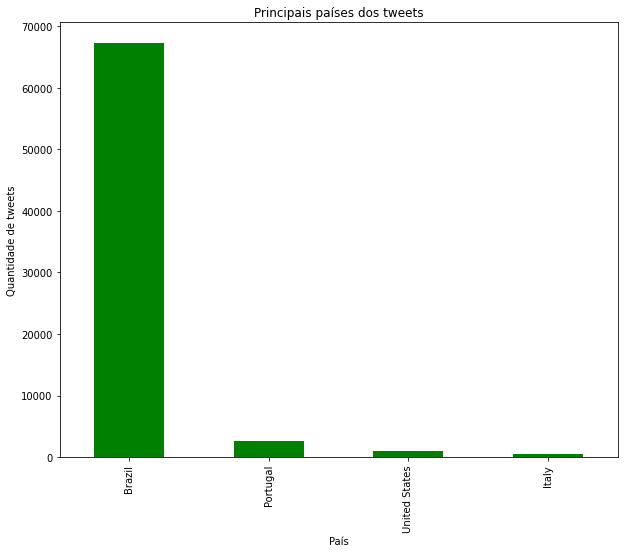

In [30]:
tweets_df.groupby('pais').pais.count().sort_values(ascending = False)[:4].plot(kind = 'bar', figsize = (10, 8), color = 'g')
plt.title('Principais pa√≠ses dos tweets')
plt.xlabel('Pa√≠s')
plt.ylabel('Quantidade de tweets')
plt.show()

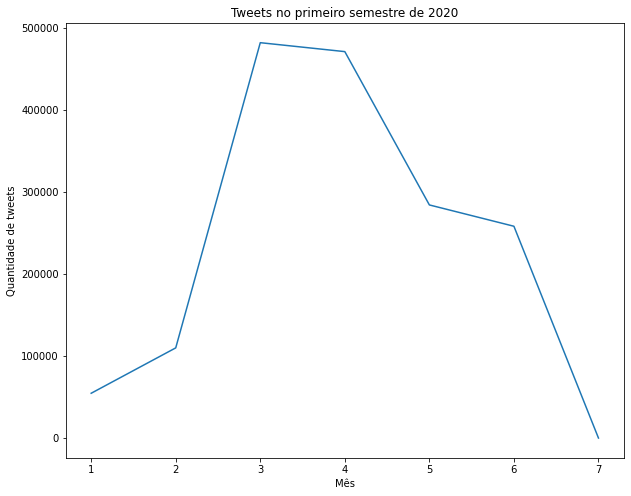

In [31]:
tweets_df.data = tweets_df.data.astype("datetime64")
tweets_df.groupby(tweets_df.data.dt.month).texto.count().plot(kind="line", figsize = (10, 8))
plt.title('Tweets no primeiro semestre de 2020')
plt.xlabel('M√™s')
plt.ylabel('Quantidade de tweets')
plt.show()

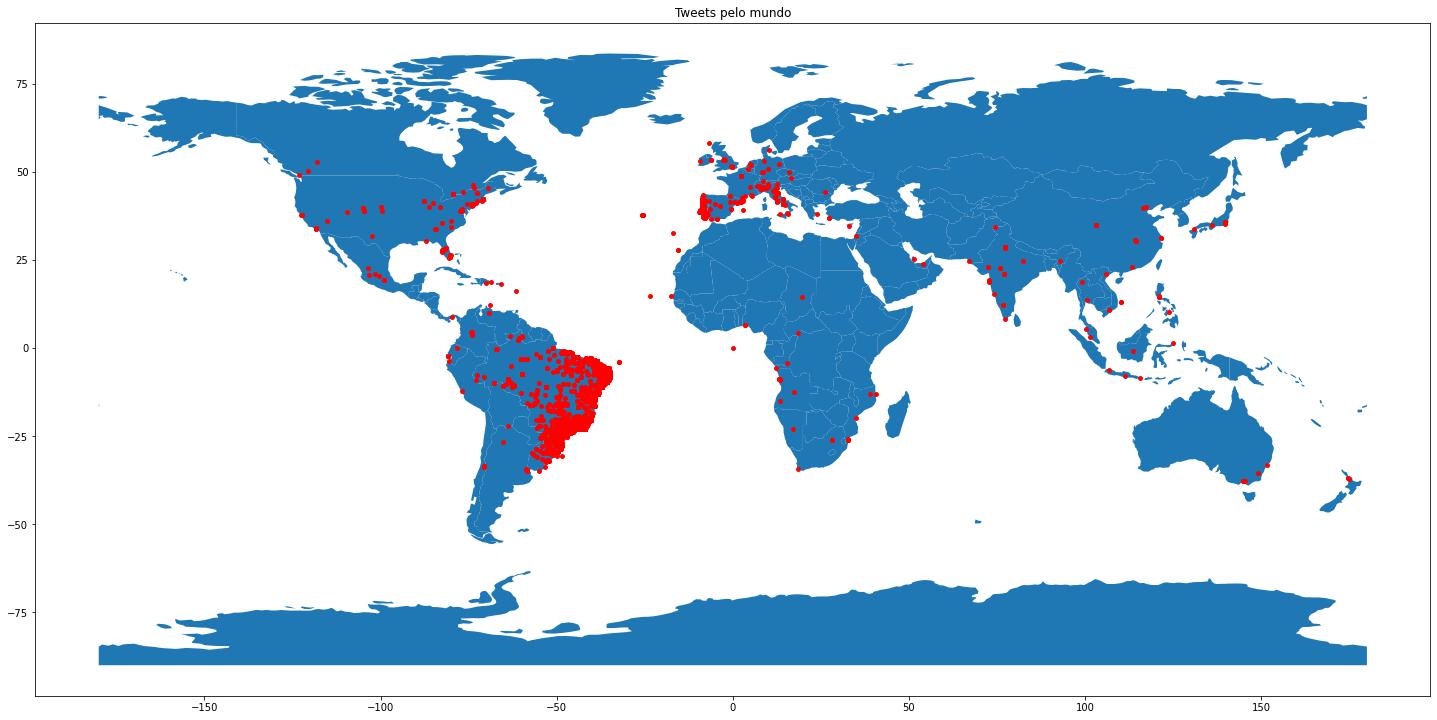

In [32]:
geometry = [Point(xy) for xy in zip(tweets_df.loc[tweets_df.latitude.notnull()].latitude, tweets_df.loc[tweets_df.longitude.notnull()].longitude)]
location_dic = {'tweet': tweets_df.loc[tweets_df.latitude.notnull()].texto, 'geometry': geometry}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

tweets_gdf = gpd.GeoDataFrame(location_dic, geometry=geometry)
tweets_gdf.plot(ax=world.plot(figsize=(25, 20)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo mundo')
plt.show()

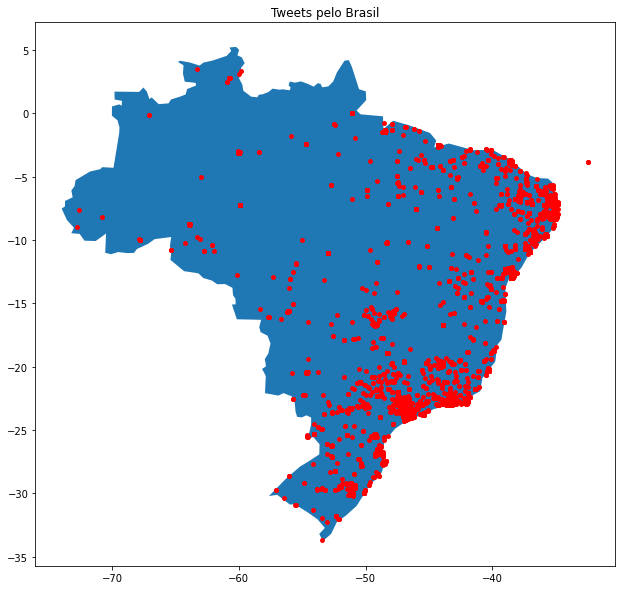

In [33]:
country = 'Brazil'
latitudes = tweets_df.loc[(tweets_df.latitude.notnull()) & (tweets_df.pais == country)].latitude
longitudes = tweets_df.loc[(tweets_df.longitude.notnull()) & (tweets_df.pais == country)].longitude
localized_tweets = tweets_df.loc[(tweets_df.latitude.notnull()) & (tweets_df.pais == country)].texto
geometry = [Point(xy) for xy in zip(latitudes, longitudes)]
location_dic = {'tweet': localized_tweets, 'geometry': geometry}
brazil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[world.name == country]

tweets_gdf = gpd.GeoDataFrame(location_dic, geometry=geometry)
tweets_gdf.plot(ax=brazil.plot(figsize=(15, 10)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo Brasil')
plt.show()

In [34]:
q2 = tweets_df[tweets_df.texto.str.contains('\?')]
q2

data  ...                              hashtags
0       2020-03-23 18:51:14  ...                                    []
3       2020-04-01 21:11:07  ...                                    []
38      2020-06-25 11:09:19  ...                                    []
45      2020-04-06 15:44:36  ...  ['COVID19', 'floripa', 'isolamento']
57      2020-03-30 00:43:36  ...                                    []
...                     ...  ...                                   ...
1658795 2020-03-24 23:50:14  ...                                    []
1658810 2020-03-26 21:43:24  ...                                    []
1658818 2020-05-25 22:53:13  ...                                    []
1658820 2020-03-13 17:26:18  ...                                    []
1658821 2020-05-12 13:02:34  ...                                    []

[172501 rows x 13 columns]

In [35]:
q2.columns

Index(['data', 'usuario', 'apelido', 'texto', 'retweet', 'seguidores',
       'idioma', 'lugar', 'pais', 'sigla', 'latitude', 'longitude',
       'hashtags'],
      dtype='object')

In [36]:
!pip install wordcloud -q


In [37]:
tweets = q2['texto']

In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
all_tweets= " ".join(s for s in tweets)

In [40]:
stopwords = set(STOPWORDS)

In [41]:
stopwords.update(["da", "meu", "em", "voc√™", "de", "ao", "os","http","https"])

In [42]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(all_tweets)

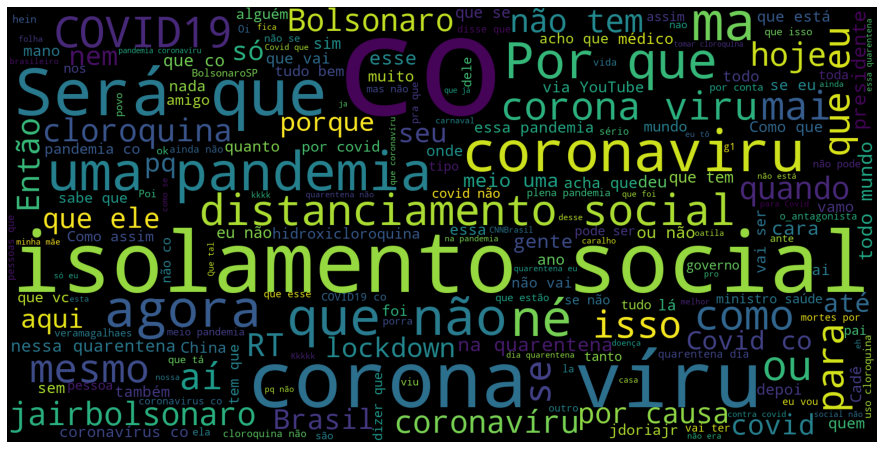

In [43]:
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)                 


# Perguntas do Twitter

In [53]:
questions_df = tweets_df.loc[tweets_df.texto.str.contains('?', regex=False)]
new_rows = []

for row in questions_df.itertuples():
  sentences = nltk.sent_tokenize(row.texto)

  for sentence in sentences:
    if '?' in sentence:
      new_rows.append((row.data, row.usuario, row.apelido, sentence, row.retweet, row.seguidores, row.idioma, row.lugar, row.pais, row.sigla, row.latitude, row.longitude, row.hashtags))

questions_df = pd.DataFrame(new_rows, columns=tweets_df.columns.array)
questions_df

data  ...                              hashtags
0      2020-03-23 18:51:14  ...                                    []
1      2020-04-01 21:11:07  ...                                    []
2      2020-06-25 11:09:19  ...                                    []
3      2020-04-06 15:44:36  ...  ['COVID19', 'floripa', 'isolamento']
4      2020-03-30 00:43:36  ...                                    []
...                    ...  ...                                   ...
206550 2020-05-25 22:53:13  ...                                    []
206551 2020-05-25 22:53:13  ...                                    []
206552 2020-05-25 22:53:13  ...                                    []
206553 2020-03-13 17:26:18  ...                                    []
206554 2020-05-12 13:02:34  ...                                    []

[206555 rows x 13 columns]

In [45]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206555 entries, 0 to 206554
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   data        206555 non-null  datetime64[ns]
 1   usuario     206548 non-null  object        
 2   apelido     206555 non-null  object        
 3   texto       206555 non-null  object        
 4   retweet     206555 non-null  int64         
 5   seguidores  206555 non-null  int64         
 6   idioma      206555 non-null  object        
 7   lugar       9275 non-null    object        
 8   pais        9275 non-null    object        
 9   sigla       9275 non-null    object        
 10  latitude    661 non-null     float64       
 11  longitude   661 non-null     float64       
 12  hashtags    206555 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 20.5+ MB


# Vis√£o geral dos dados



1. Devem apresentar um resumo (sum√°rio) com as estat√≠sticas dos dados originais, ou seja, sem
qualquer pr√©-processamento. A apresenta√ß√£o deste tipo de informa√ß√£o relevante para que outras pessoas possam ter uma vis√£o geral dos dados. As estat√≠sticas podem ser apresentadas
atrav√©s de tabelas e/ou gr√°ficos.

Total de Registros | Total de Twitters | Total de Cidades | Total de HashTags 
--- | --- | --- | ---
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3 | Row 1, Col 4


---

Total de Registros Nulos | Total de  | Total de  | Total de  
--- | --- | --- | ---
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3 | Row 1, Col 4


---

Inserir Gr√°fico

2. As mensagens foram pr√©-processadas para que as perguntas (quest√µes) fossem identificadas.
Essa cole√ß√£o de perguntas corresponde ao dataset ‚ÄúDuvidasDB‚Äù. A seguir, a equipe deve
apresentar as estat√≠sticas sobre esses dados.

Total de Perguntas Selecioandas | Total de  | Total de  
--- | --- | --- 
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3

Inserir Gr√°fico


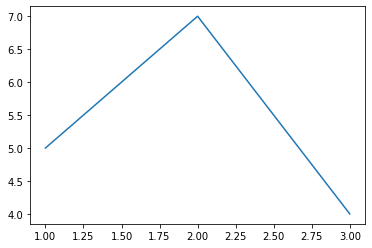

In [46]:
plt.plot([1,2,3],[5,7,4])
plt.show()

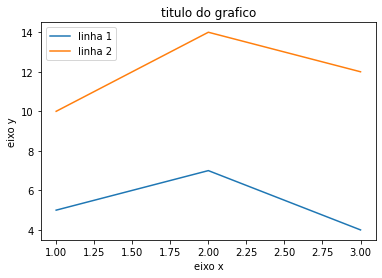

In [47]:
x = [1,2,3]
y = [5,7,4]
x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x,y,label = 'linha 1')
plt.plot(x2,y2, label = 'linha 2')

plt.xlabel('eixo x')
plt.ylabel('eixo y')

plt.title('titulo do grafico')
plt.legend()

plt.show()

[]

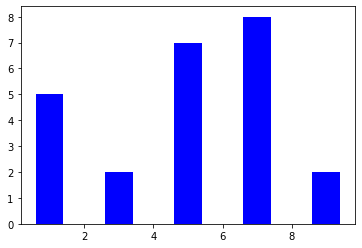

In [48]:
plt.bar([1,3,5,7,9],[5,2,7,8,2],label=' categoria 1', color = 'b')
plt.plot()

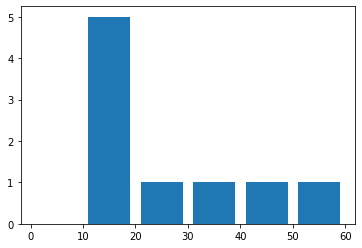

In [49]:
idades = [10,15,14,18,33,43,56,23,12]
div = [0,10,20,30,40,50,60]
plt.hist(idades, div,histtype='bar', rwidth=0.8)
plt.show()

[]

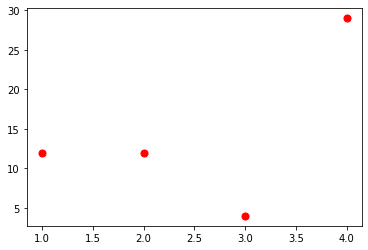

In [50]:
x = [1,2,3,4]
y = [12,12,4,29]

plt.scatter(x,y,label='gols', color='r', s=50, marker = "o")
plt.plot()

# Temas Discutidos

As equipes devem fazer uma an√°lise sobre os temas que s√£o debatidos nas perguntas dos
postadas pelos usu√°rios. Fa√ßa uma an√°lise se as perguntas s√£o relativas aos seguintes temas:



1.   Doen√ßa. Quando a pergunta √© relativa √† doen√ßa. Deve-se observar que a doen√ßa √© identificada por v√°rios nomes. Exemplo: coronav√≠rus, corona, COVID-19, etc.
2.   Medicamento. Quando a pergunta √© sobre o uso de determinado medicamento no tratamento
da doen√ßa.
3.   Organiza√ß√µes. Quando a pergunta √© relativa a uma determinada entidade ou organiza√ß√£o.
Emissora de TV, Minist√©rio da Sa√∫de ou empresas, s√£o exemplos de organiza√ß√µes.
4.   Pessoas. Quando a pergunta √© sobre determinada pessoa. Por exemplo, a pergunta pode
ser sobre a atua√ß√£o que determinado pol√≠tico ou pessoa famosa teve durante esse per√≠odo de
pandemia.





In [51]:

d1['texto'] = q2['texto'].str.lower()
print(d1.shape)
d1.groupby(d1.texto.str.contains('coronavirus')).texto.count()

NameError: ignored

# Vis√£o Temporal

Deve-se fazer uma an√°lise temporal das perguntas que formam o dataset DuvidasDB. Pode-se considerar o intervalo temporal de dias, semanas ou meses. A escolha do intervalo de tempo ficar√° a cargo das equipes. Exemplos de an√°lise temporal: a) houve um aumento no n√∫mero de perguntas ao longo do tempo? b) houve uma mudan√ßa no perfil das perguntas ao longo do tempo?

# Vis√£o Geogr√°fica

Deve-se fazer uma an√°lise geogr√°fica (espacial) das perguntas que formam o dataset DuvidasDB.
Existem algumas colunas no dataset que trazem a informa√ß√£o das localiza√ß√µes como, por exemplo,
o pa√≠s, estado e cidade. Em alguns tu√≠tes √© poss√≠vel ainda identificar as coordenadas geogr√°ficas de latitude e longitude. Exemplo de an√°lise geogr√°fica: a) os usu√°rios de regi√µes diferentes fazem perguntas com diferentes focos? Por exemplo, ser√° que os usu√°rios de uma regi√£o perguntam mais sobre a doen√ßa ou sobre o tratamento? Essa an√°lise ainda pode ser realizada em diversos n√≠veis de
√°rea (cidade, estado ou regi√£o). Al√©m de apresentar a distribui√ß√£o das d√∫vidas dos usu√°rios por regi√£o, a equipe dever√° fazer uma an√°lise dessa distribui√ß√£o. Por exemplo, apresentar as raz√µes(ou hip√≥teses) da ocorr√™ncia dessa distribui√ß√£o.